# Fake News Detection

#### Importing the Dependencies

In [2]:
#core python libraries
import pandas as pd
import numpy as np
import re
import string

#NLP Tools(Text Processing)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Machine Learning(Modelling)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saket\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Loading the Data

In [4]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

#### Labelling the Data

In [5]:
data_fake['class'] = 0
data_true['class'] = 1

#### Combining and shuffling the data

In [6]:
data = pd.concat([data_fake, data_true], axis = 0)
data = data.sample(frac=1)

In [7]:
data.head()

,title,text,subject,date,class
16451,OBAMA’S GITMO BOARD RELEASES “High Risk” Explo...,"While Obama golfs in Martha s Vineyard, yet an...",Government News,"Aug 14, 2016",0
11876,"VIETNAM VET, MILITARY “Lifer” DESTROYS Crybaby...",A powerful letter from a lifer in the milita...,politics,"Jan 17, 2017",0
1246,New Info Reveals The TRUE Lengths Trump Went ...,It s well known by now that Trump unsuccessful...,News,"June 7, 2017",0
19006,MIKE HUCKABEE SCORCHES THE PRESS: “Grow up!…St...,,left-news,"Mar 10, 2017",0
6437,This Is Proof That Donald Trump May Be The WO...,While there have been what seems like dozens o...,News,"May 11, 2016",0


In [8]:
data = data.reset_index(drop = True)

In [9]:
data.head()

,title,text,subject,date,class
0,OBAMA’S GITMO BOARD RELEASES “High Risk” Explo...,"While Obama golfs in Martha s Vineyard, yet an...",Government News,"Aug 14, 2016",0
1,"VIETNAM VET, MILITARY “Lifer” DESTROYS Crybaby...",A powerful letter from a lifer in the milita...,politics,"Jan 17, 2017",0
2,New Info Reveals The TRUE Lengths Trump Went ...,It s well known by now that Trump unsuccessful...,News,"June 7, 2017",0
3,MIKE HUCKABEE SCORCHES THE PRESS: “Grow up!…St...,,left-news,"Mar 10, 2017",0
4,This Is Proof That Donald Trump May Be The WO...,While there have been what seems like dozens o...,News,"May 11, 2016",0


In [10]:
data = data.drop(['title', 'subject', 'date'], axis = 1)

In [11]:
data.head()

,text,class
0,"While Obama golfs in Martha s Vineyard, yet an...",0
1,A powerful letter from a lifer in the milita...,0
2,It s well known by now that Trump unsuccessful...,0
3,,0
4,While there have been what seems like dozens o...,0


#### Definig clean_text function and applying it to data

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() #lowercase
    text = re.sub(r'https?://\S+|www.\.\S+', '', text) #removes links
    text = re.sub(r'<.*?>+', '', text) # removes HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text) #removes special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip() #removes extra spaces

    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(words)

In [13]:
data['text'] = data['text'].apply(clean_text)

#### Creating Dependent and Independent Variables

In [14]:
x = data['text']
y = data['class']

#### Splitting training and testing data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2569, stratify = y)

In [16]:
print(y_train.value_counts(), '\n') #checking the balance
print(y_test.value_counts())

class
0    17610
1    16063
Name: count, dtype: int64 

class
0    5871
1    5354
Name: count, dtype: int64


#### Text Vectorization with TF-IDF

In [17]:
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

#### Defining a function for evaluating the Model

In [18]:
def model_eval(y_pred):
    print('Accuracy of the Model: ', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

#### Defining a function for Visualizing Confusion Matrix

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_cm(y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    return plt.show() 

#### Model Training and Visualizing Confusion Matrix

##### Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

LR_Model = LogisticRegression()
LR_Model.fit(xv_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


LR Model Evalution

In [21]:
y_pred_lr = LR_Model.predict(xv_test)
model_eval(y_pred_lr)

Accuracy of the Model:  0.9853897550111359
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5871
           1       0.98      0.99      0.98      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



Visualizing Confusion Matrix for LR Model

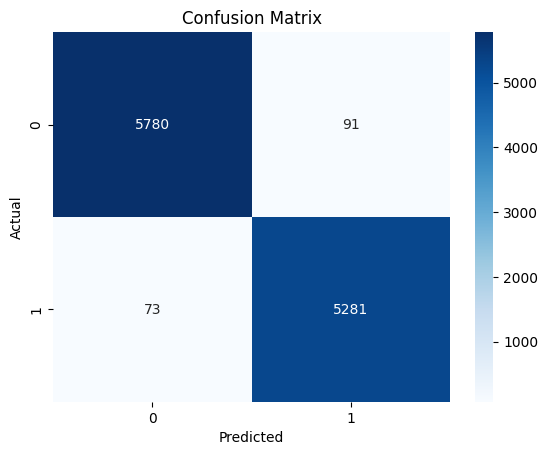

In [22]:
visualize_cm(y_pred_lr)

##### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


DT Model Evalution

In [24]:
y_pred_dt = DT.predict(xv_test)
model_eval(y_pred_dt)

Accuracy of the Model:  0.9966146993318485
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871
           1       1.00      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



Visualizing Confusion Matrix for DT Model

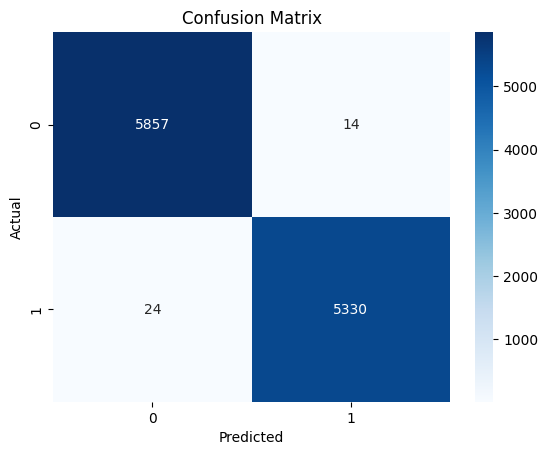

In [25]:
visualize_cm(y_pred_dt)

##### Gradient Boosting Classifier Model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(xv_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


GB Model Evalution

In [27]:
y_pred_gb = GB.predict(xv_test)
model_eval(y_pred_gb)

Accuracy of the Model:  0.9964365256124722
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5871
           1       0.99      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



Visualizing Confusion Matrix for GB Model

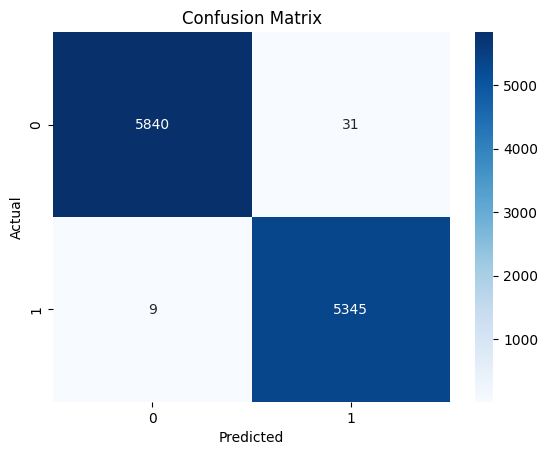

In [28]:
visualize_cm(y_pred_gb)

##### Random Forest Classifier Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(xv_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


RF Model Evalution

In [30]:
y_pred_rf = RF.predict(xv_test)
model_eval(y_pred_rf)

Accuracy of the Model:  0.9918040089086859
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5871
           1       0.99      0.99      0.99      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



Visualizing Confusion Matrix for RF Model

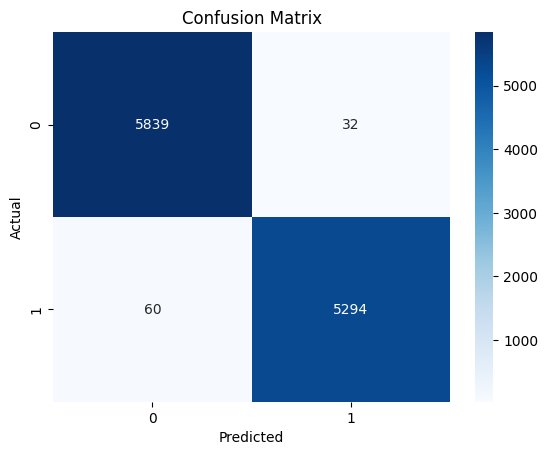

In [31]:
visualize_cm(y_pred_rf)

#### Saving the Best Model and Vectorizer

In [ ]:
import pickle 

pickle.dump(RF, open('model.pkl', 'wb')) #since RandomForestClassifier has high accuracy
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb')) # saving the TF-IDF vectorizer

In [36]:
import os
os.getcwd()

'C:\\Users\\saket\\Fake News Detection Project'